In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [23]:
# These 
L = 145.44
m = 8192

arr = np.fft.fftshift(np.fft.fftfreq(m, d=1.0 / (2.0 * L)))

diffracted100 = np.load('/data101/prunet/diffraction_n100_m8192_500.npy')
diffracted100 = diffracted100[:,m//2]

diffracted200 = np.load('/data101/prunet/diffraction_n200_m8192_500.npy')
diffracted200 = diffracted200[:,m//2]

diffracted400 = np.load('/data101/prunet/diffraction_n400_m8192_500.npy')
diffracted400 = diffracted400[:,m//2]

diffracted1000 = np.load('/data101/prunet/diffraction_n1000_m8192_500.npy')
diffracted1000 = diffracted1000[:,m//2]

diffracted2000 = np.load('/data101/prunet/diffraction_n2000_m8192_500.npy')
diffracted2000 = diffracted2000[:,m//2]

diffracted4000 = np.load('/data101/prunet/diffraction_n4000_m8192_500.npy')
diffracted4000 = diffracted4000[:,m//2]

diffracted8000 = np.load('/data101/prunet/diffraction_n4000_m8192_500.npy')
diffracted8000 = diffracted8000[:,m//2]


diffracted_claude = np.load('/data101/prunet/diffraction_claude_500.npy')
diffracted_claude = diffracted_claude[:,m//2]


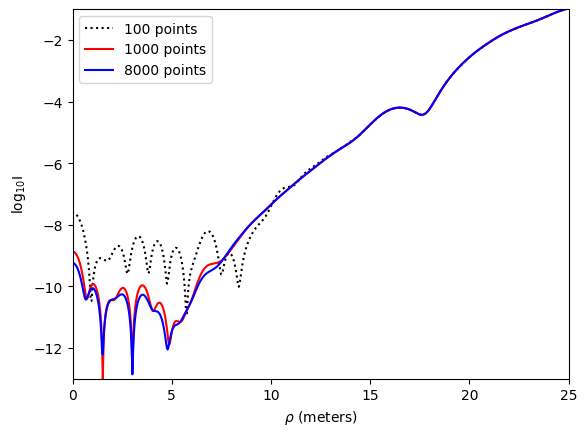

In [31]:
plt.clf()

ax=plt.gca()
ax.plot(arr, 2.*np.log10(np.abs(diffracted100)), label='100 points', color='black',linestyle='dotted')
#plt.plot(arr, 2.*np.log10(np.abs(diffracted200)), label='200 points')
#plt.plot(arr, 2.*np.log10(np.abs(diffracted400)), label='400 points')
ax.plot(arr, 2.*np.log10(np.abs(diffracted1000)), label='1000 points', color='red')
#plt.plot(arr, 2.*np.log10(np.abs(diffracted2000)), label='2000 points')
ax.plot(arr, 2.*np.log10(np.abs(diffracted8000)), label='8000 points', color='blue')
##ax.plot(arr, 2.*np.log10(np.abs(diffracted_claude)), label='High res. 2D FFT')
plt.ylabel(r'log$_{10}$I')
plt.xlabel(r'$\rho$ (meters)')
plt.xlim(0,25)
plt.ylim(-13,-1)
#x1,x2,y1,y2 = 0,5,-13,-7
#axins = ax.inset_axes([0.5,0.05,0.45,0.5],xlim=(x1,x2),ylim=(y1,y2),xticklabels=[],yticklabels=[])
#axins.set_xticks([])
#axins.set_yticks([])
#axins.plot(arr, 2.*np.log10(np.abs(diffracted100)))
#axins.plot(arr, 2.*np.log10(np.abs(diffracted4000)))
#axins.plot(arr, 2.*np.log10(np.abs(diffracted8000)))
##axins.plot(arr, 2.*np.log10(np.abs(diffracted_claude)))

#ax.indicate_inset_zoom(axins,edgecolor='black')
ax.legend()
plt.show()

In [10]:
fmask = np.load('/data101/prunet/fmask_n2000_m8192.npy')
fmask.shape

(8192, 8192)

In [ ]:
plt.imshow(np.log10(np.abs(fmask)))
plt.jet()
plt.colorbar()
plt.show()


In [ ]:
import h5py
f = h5py.File('/data101/prunet/Pour_Simon/NW2_FouOc_Petal_N23n21m13.mat')
list(f.keys())
fmask_claude = np.asarray(f['FouOc'])
fmask_claude = fmask_claude['real']+1j*fmask_claude['imag']

In [ ]:
np.std(np.abs(fmask_claude-fmask))

